In [145]:
from re import A
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

step = 15
raw_df = pd.read_csv('./datos estanque/datos sin falla/15s.csv')
df = raw_df[::step]
# hc_dot = pd.read_csv('./datos estanque/datos con falla/low_pid_t5s_fuga_grave_noruido_hcdot.csv')

y = df['hc'][1:]
u = df['f_pid'].shift(1)[1:]
# armax = sm.tsa.ARIMA(y, exog=u).fit()

# print(armax.summary())

def estanque(h_tm1, f_tm1, dt):
    
    h_tm1 = np.where(h_tm1 < 0, 0, h_tm1)
    a1 = 5.43
    a2 = -78.23
    b = 20.21
    k1 = 0.63
    k2 = 11.4
    k3 = 17.1

    F_in = a1*f_tm1 + a2
    F_out = b*h_tm1**0.5
    dF = F_in - F_out
    h_dot = dF/(k3 + k2*h_tm1 + k1*h_tm1**2)
    return((h_dot, h_dot*dt+h_tm1))

In [264]:
df['hc'][::5][1*5]

24.4274120352632

(0.0, 1000.0)

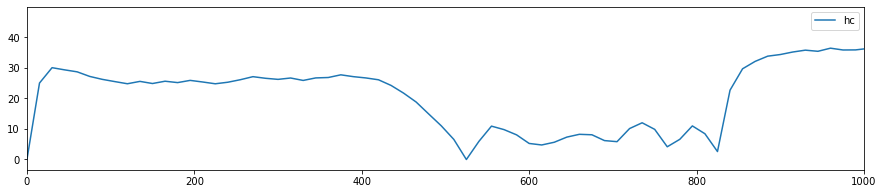

In [148]:
#plot df
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(df['hc'], label='hc')
# ax.plot(df['f_pid'][::5][1*5:], label='f_pid')
ax.legend()
#limit x to 1000
ax.set_xlim(0, 1000)


In [149]:
#naive prediction
from sklearn.metrics import mean_squared_error
y_pred_naive = (df['hc'].shift(1)[1:].values)
#replace nans by 0
y_pred_naive[np.isnan(y_pred_naive)] = 0
mean_squared_error((df['hc'][1:].values), y_pred_naive)

5.83842675255018

In [152]:
#model mse prediction
y_pred = estanque(df['hc'].shift(1)[1:], df['f_pid'].shift(1)[1:], 15)[1].values
y_test = df['hc'][1:].values
mean_squared_error(y_test, y_pred)


91.51129497056937

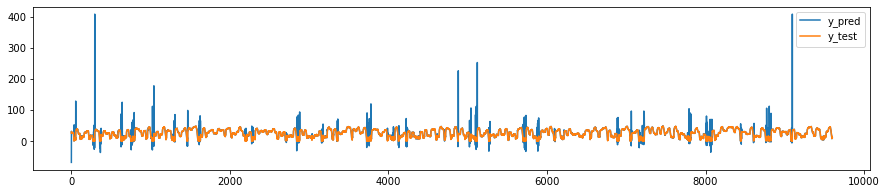

In [153]:
#plot y_pred
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(y_pred, label='y_pred')
ax.plot(y_test, label='y_test')
ax.legend()

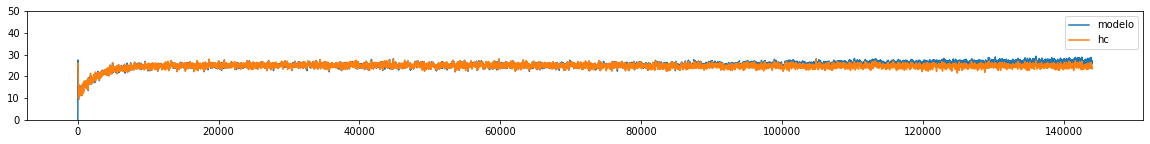

In [77]:

modelo = estanque(df['hc'][::15].shift(1)[1:], df['f_pid'][::15].shift(1)[1:], 15)[1]
plt.figure(figsize=(20, 2))
plt.plot(df['tiempo'][::15][1:], modelo, label='modelo')
plt.plot(df['tiempo'][1:], df['hc'][1:], label = 'hc')
plt.legend()
plt.ylim(0,50)
# plt.xlim(100,1200)
plt.show()



In [89]:
df['hc'][::15].shift(0)

0          0.000000
15        25.000001
30        26.094831
45        25.578016
60        23.192049
            ...    
143940    23.771956
143955    24.227710
143970    24.666576
143985    24.602942
144000    23.462518
Name: hc, Length: 9601, dtype: float64

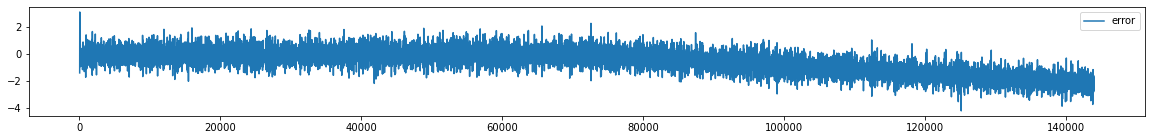

In [90]:
#plot error
error = df['hc'][::15].shift(0) - modelo.shift(0)[1:]#(df['hc'][::1][1:]-modelo).rolling(1).mean()
plt.figure(figsize=(20, 2))
plt.plot(df['tiempo'][::15], error.rolling(1).mean(), label='error')
plt.legend()
# plt.ylim(-0.01, 0.01)
plt.show()


In [91]:
df_test = df.copy()#pd.read_csv('./datos estanque/datos con falla/old/falla_fuga_t5s_noint.csv')

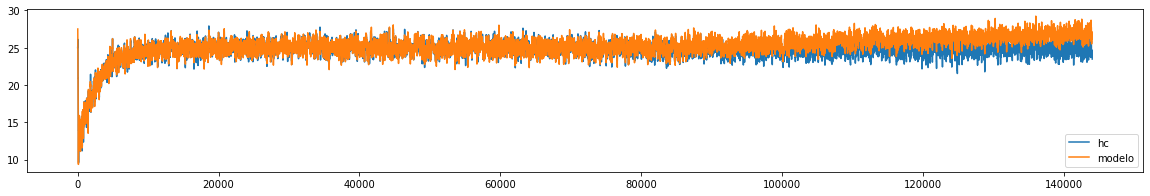

In [113]:
#test with test data
modelo_test = estanque(df_test['hc'][::15].shift(1)[1:], df_test['f_pid'][::15].shift(1)[1:], 15)[1]
plt.figure(figsize=(20, 3))
plt.plot(df_test['tiempo'][1:], df_test['hc'][1:], label = 'hc')
plt.plot(df_test['tiempo'][::15][1:].shift(1), modelo_test, label='modelo')
plt.legend()
# plt.xlim(36000, 36000+2*1000)
plt.show()


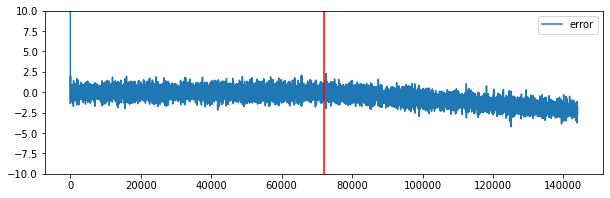

In [116]:
#plot error
plt.figure(figsize=(10, 3))
plt.plot(df_test['tiempo'][::15][1:], (df_test['hc'][::15][1:].shift(0)-modelo_test).rolling(1).mean(), label='error')
plt.legend()
#draw a line in x = 36000/5
plt.axvline(x=72000, color='r')
plt.ylim(-10,10)
plt.show()


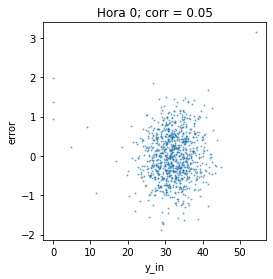

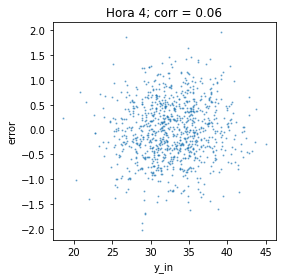

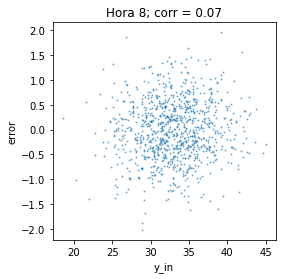

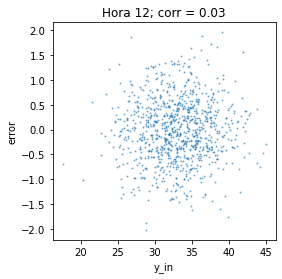

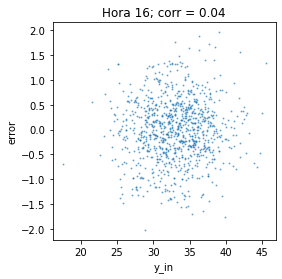

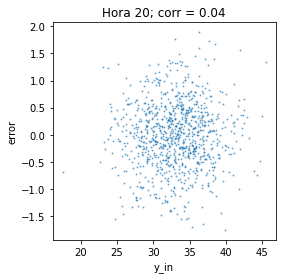

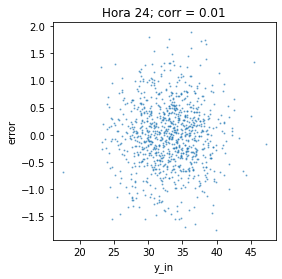

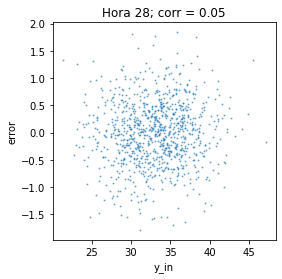

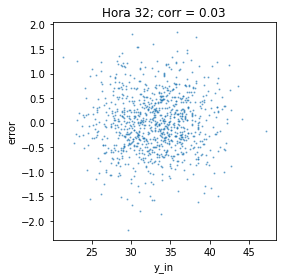

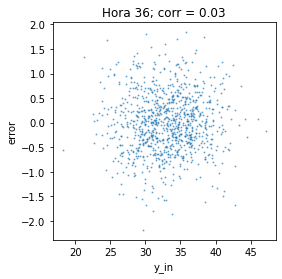

In [132]:
#scatter plot error vs hc
for i in range(10):
    start = int(i*3600/15)
    window = int(4*3600/15)
    # error = (df_test['hc'][::1][1:]-modelo_test)[start:start+window][1:]
    error = (df_test['hc'][::15][1:].shift(0)-modelo_test).rolling(1).mean()
    error = error[start:start+window][1:]
    y_in =df_test['f_pid'][::15][start:start+window].shift(1)[1:]
    # y_in = pd.Series(F_int)[start:start+window].shift(1)[1:]
    # y_in = (y_in - y_in.mean())/y_in.std()
    
    plt.figure(figsize=(4,4))
    plt.scatter(y_in[1:], error[1:], s=1, alpha=0.5)
    #calculate correlation between y_in and error

    corr = np.corrcoef(np.array(y_in), np.array(error))[0,1]

    plt.title(f'Hora {i*4}; corr = {corr:.2f}')
    plt.xlabel('y_in')
    plt.ylabel('error')
    #center in 0,0
    # plt.xlim(-10, 10)
    # plt.ylim(-10, 10)


    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()